# DeepLearning || Aprendizaje Automático para Textos
---

*Creation Date : 9-May-2023*

- **Notebook:** Julio César Martínez I.
- **Supported:** Senior Data Scientist Fransisco Alfaro & Senior Data Scientist Alfonso Tobar

# Tabla de Contenidos
---

1. Inicialización
2. Carga de Datos
3. EDA / Explore Data Analyze
4. Procedimiento de Evaluación
5. Normalización
6. División de Datos Entrenamiento / Prueba
7. Trabajar con Modelos
8. Mis Reseñas
9. Conclusiones

# Apache Licence
---

Copyright @2023 by Julio César Martínez Izaguirre

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License

# Introducción
---

Las críticas y comentarios positivos que los usuarios dejan en Internet sobre nuestra actividad son de **gran importancia** para nuestros negocios. De hecho, por impresionante que parezca, la reputación de marca hoy en día está en manos de los consumidores. Todos hemos **comprado** en Internet alguna vez, y cuando leemos una ficha de producto, podemos mostrarnos un poco escépticos acerca de una marca desconocida ya que muchas veces nos preguntamos si la descripción del producto se corresponderá con la realidad.

Por ello, en la industria del entretenimiento como la música, el streaming, las series y las películas se toman muy enserio las opiniones de los internautas, pues estas son un referente muy omportante de hacia dónde pueden orientarse los próximos proyectos que una productora desarrolle.

Así pues este es el caso de **Film Junky Union** para quienes realizaremos el siguiente proyecto.

# Librerías Requeridas
---

- Pandas
- NumPy
- Math
- Matplotlib
- Seaborn
- TQDM
- BERT
- LightGBM
- NLTK
- Spacy
- RE

# Descripcipción del proyecto
---

**Film Junky Union**, una nueva comunidad vanguardista para los aficionados de las películas clásicas, está desarrollando un sistema para filtrar y categorizar reseñas de películas. Tu objetivo es **entrenar un modelo** para detectar las críticas negativas de forma automática. Para lograrlo, utilizarás un conjunto de datos de **reseñas de películas** de IMDB con leyendas de polaridad para construir un modelo para clasificar las reseñas positivas y negativas. Este deberá alcanzar un valor **F1** de al menos **0.85**.

## || Inicialización

In [1]:
import math
import time
import spacy
import re
import torch
import transformers

import lightgbm
from lightgbm import LGBMClassifier

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns

import sklearn
import sklearn.metrics as metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize.toktok import ToktokTokenizer
# Activamos solo la primera vez
nltk.download('stopwords')

from collections import Counter

import tqdm
from tqdm.auto import tqdm

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 100
%matplotlib inline
start_time = time.time()

print("Pandas Version:      ", pd.__version__)
print("Numpy Version :      ", np.__version__)
print("Matplotlib Version:  ", matplotlib.__version__)
print("Seaborn Versión:     ", sns.__version__)
print("Scikit-Learn Version:", sklearn.__version__)
print("Nltk version:        ", nltk.__version__)
print("Spacy version:       ", spacy.__version__)
print("Regex version:       ", re.__version__)

Pandas Version:       1.2.4
Numpy Version :       1.21.1
Matplotlib Version:   3.3.4
Seaborn Versión:      0.11.1
Scikit-Learn Version: 0.24.1
Nltk version:         3.6.1
Spacy version:        3.2.0
Regex version:        2.2.1


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'png'
# la siguiente línea proporciona gráficos de mejor calidad en pantallas HiDPI
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [3]:
# esto es para usar progress_apply, puedes leer más en https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

## || Cargar datos

In [4]:
df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

In [5]:
df_reviews.head()

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,How the hell did they get this made?! Presenti...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,There is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Um .... a serious film about troubled teens in...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281


In [6]:
print("Columnas del set:", df_reviews.shape[1])
print("Filas en el set :", df_reviews.shape[0])
print("Tamaño del set  :", df_reviews.size)

Columnas del set: 17
Filas en el set : 47331
Tamaño del set  : 804627


In [7]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

Examinando valores duplicados y valores ausentes en el set de datos

In [8]:
df_reviews.duplicated().sum()

0

In [9]:
column_names = df_reviews.columns
for column in column_names:
    print(column + ' - ' + str(df_reviews[column].isnull().sum()))

tconst - 0
title_type - 0
primary_title - 0
original_title - 0
start_year - 0
end_year - 0
runtime_minutes - 0
is_adult - 0
genres - 0
average_rating - 2
votes - 2
review - 0
rating - 0
sp - 0
pos - 0
ds_part - 0
idx - 0


**Descripción de los Datos**

- `review`: el texto de la reseña
- `pos`: el objetivo, '0' para negativo y '1' para positivo
- `ds_part`: 'entrenamiento'/'prueba' para la parte de entrenamiento/prueba del conjunto de datos, respectivamente

**Conclusiones**

Nuestros datos estan en orden, las columnas tienen los nombres de forma correcta. El total de **valores ausentes** es solo de 4 que para fines de este proyecto son considerados irrelevantes por lo tanto no los modificaremos. Para este proyecto tenemos un total de 47,331 filas y 17 columnas que al multiplicar obtenemos un gran total de poco más de **800 mil** valores.

## || EDA / Exploring Data Analyze
---

In [10]:
df_reviews.describe()

,start_year,is_adult,average_rating,votes,rating,pos,idx
count,47331.000000,47331.000000,47329.000000,4.732900e+04,47331.000000,47331.000000,47331.000000
mean,1989.631235,0.001732,5.998278,2.556292e+04,5.484608,0.498954,6279.697999
std,19.600364,0.041587,1.494289,8.367004e+04,3.473109,0.500004,3605.702545
min,1894.000000,0.000000,1.400000,9.000000e+00,1.000000,0.000000,0.000000
25%,1982.000000,0.000000,5.100000,8.270000e+02,2.000000,0.000000,3162.000000
50%,1998.000000,0.000000,6.300000,3.197000e+03,4.000000,0.000000,6299.000000
75%,2004.000000,0.000000,7.100000,1.397400e+04,9.000000,1.000000,9412.000000
max,2010.000000,1.000000,9.700000,1.739448e+06,10.000000,1.000000,12499.000000


Visualizando variables categóricas

In [11]:
category = [
    'tconst', 
    'title_type', 
    'primary_title', 
    'original_title', 
    'end_year', 
    'runtime_minutes', 
    'genres', 
    'sp'
]

for col in df_reviews[category]:
    print(f'{col}: {df_reviews[col].nunique()}')

tconst: 6648
title_type: 10
primary_title: 6555
original_title: 6562
end_year: 60
runtime_minutes: 249
genres: 585
sp: 2


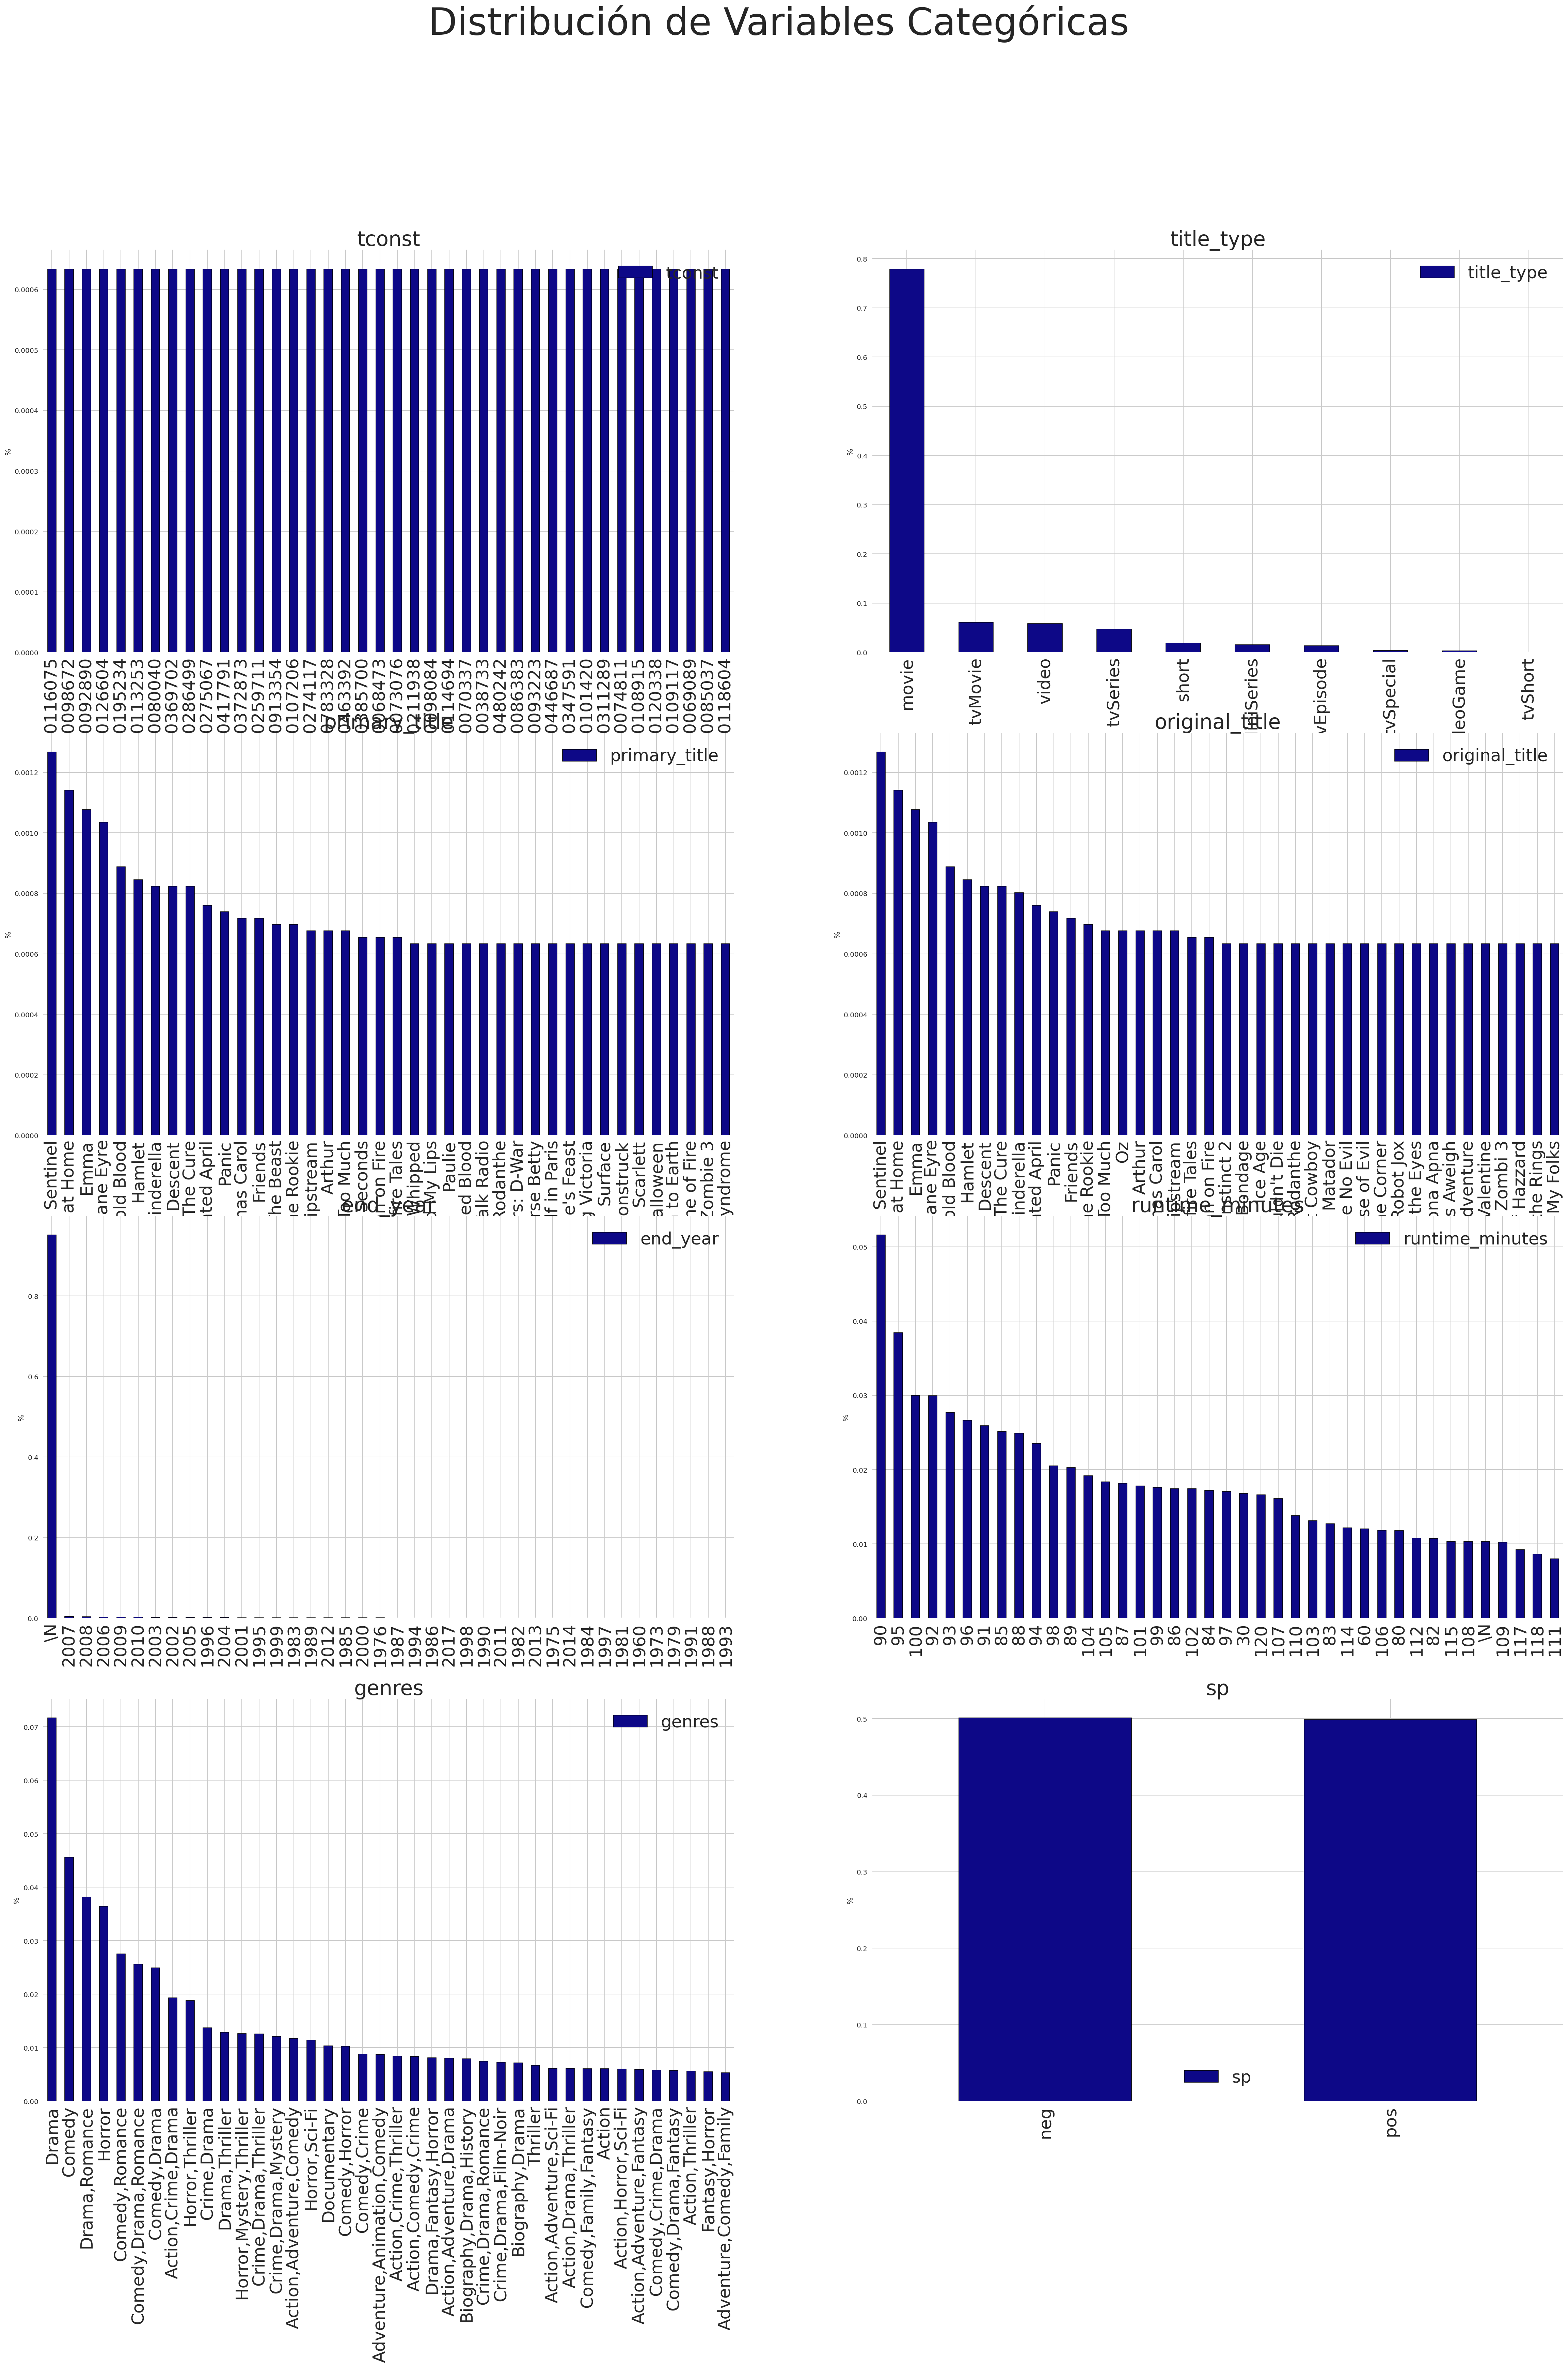

In [12]:
# Observando la Distribución en Variables Categóricas
#----------------------------------------------------
a = 4
b = 2 
c = 1

fig = plt.subplots(figsize=(40,50))

sns.set_style('whitegrid')
for i in df_reviews[category]:
    plt.subplot(a, b, c)
    plt.ylabel('%')
    df_reviews[category][i].value_counts(normalize=True).head(40).plot(
        kind='bar', 
        title=i, 
        rot=90, 
        edgecolor='black', 
        cmap='plasma', 
        linewidth=0.8
    )
    plt.legend(fontsize=25)
    plt.title(i).set_size(30)
    plt.xticks(fontsize = 25)
    c = c+1
    
plt.suptitle('Distribución de Variables Categóricas', fontsize=55)
plt.tight_layout
plt.show();  

**Observaciones**

- El formato que cuenta con más reviews es el de **películas/movies**
- La película con más comentarioes es **Sentinel**
- El mayor tiempo de duración en películas es de **90 minutos**
- Los 3 géneros más comentados son:
    - Drama
    - Comedia
    - Romance
- La distribución de comentarios positivos y negativos es del **50%**

Visualizando variables continuas

In [13]:
# Variables Numéricas
number = ['start_year', 'votes', 'pos', 'idx']

# Revisamos los valores promedio
for col in df_reviews[number]:
    print(f'{col}: {df_reviews[col].mean()}')

start_year: 1989.6312353425874
votes: 25562.917323416932
pos: 0.4989541737972999
idx: 6279.697999197144


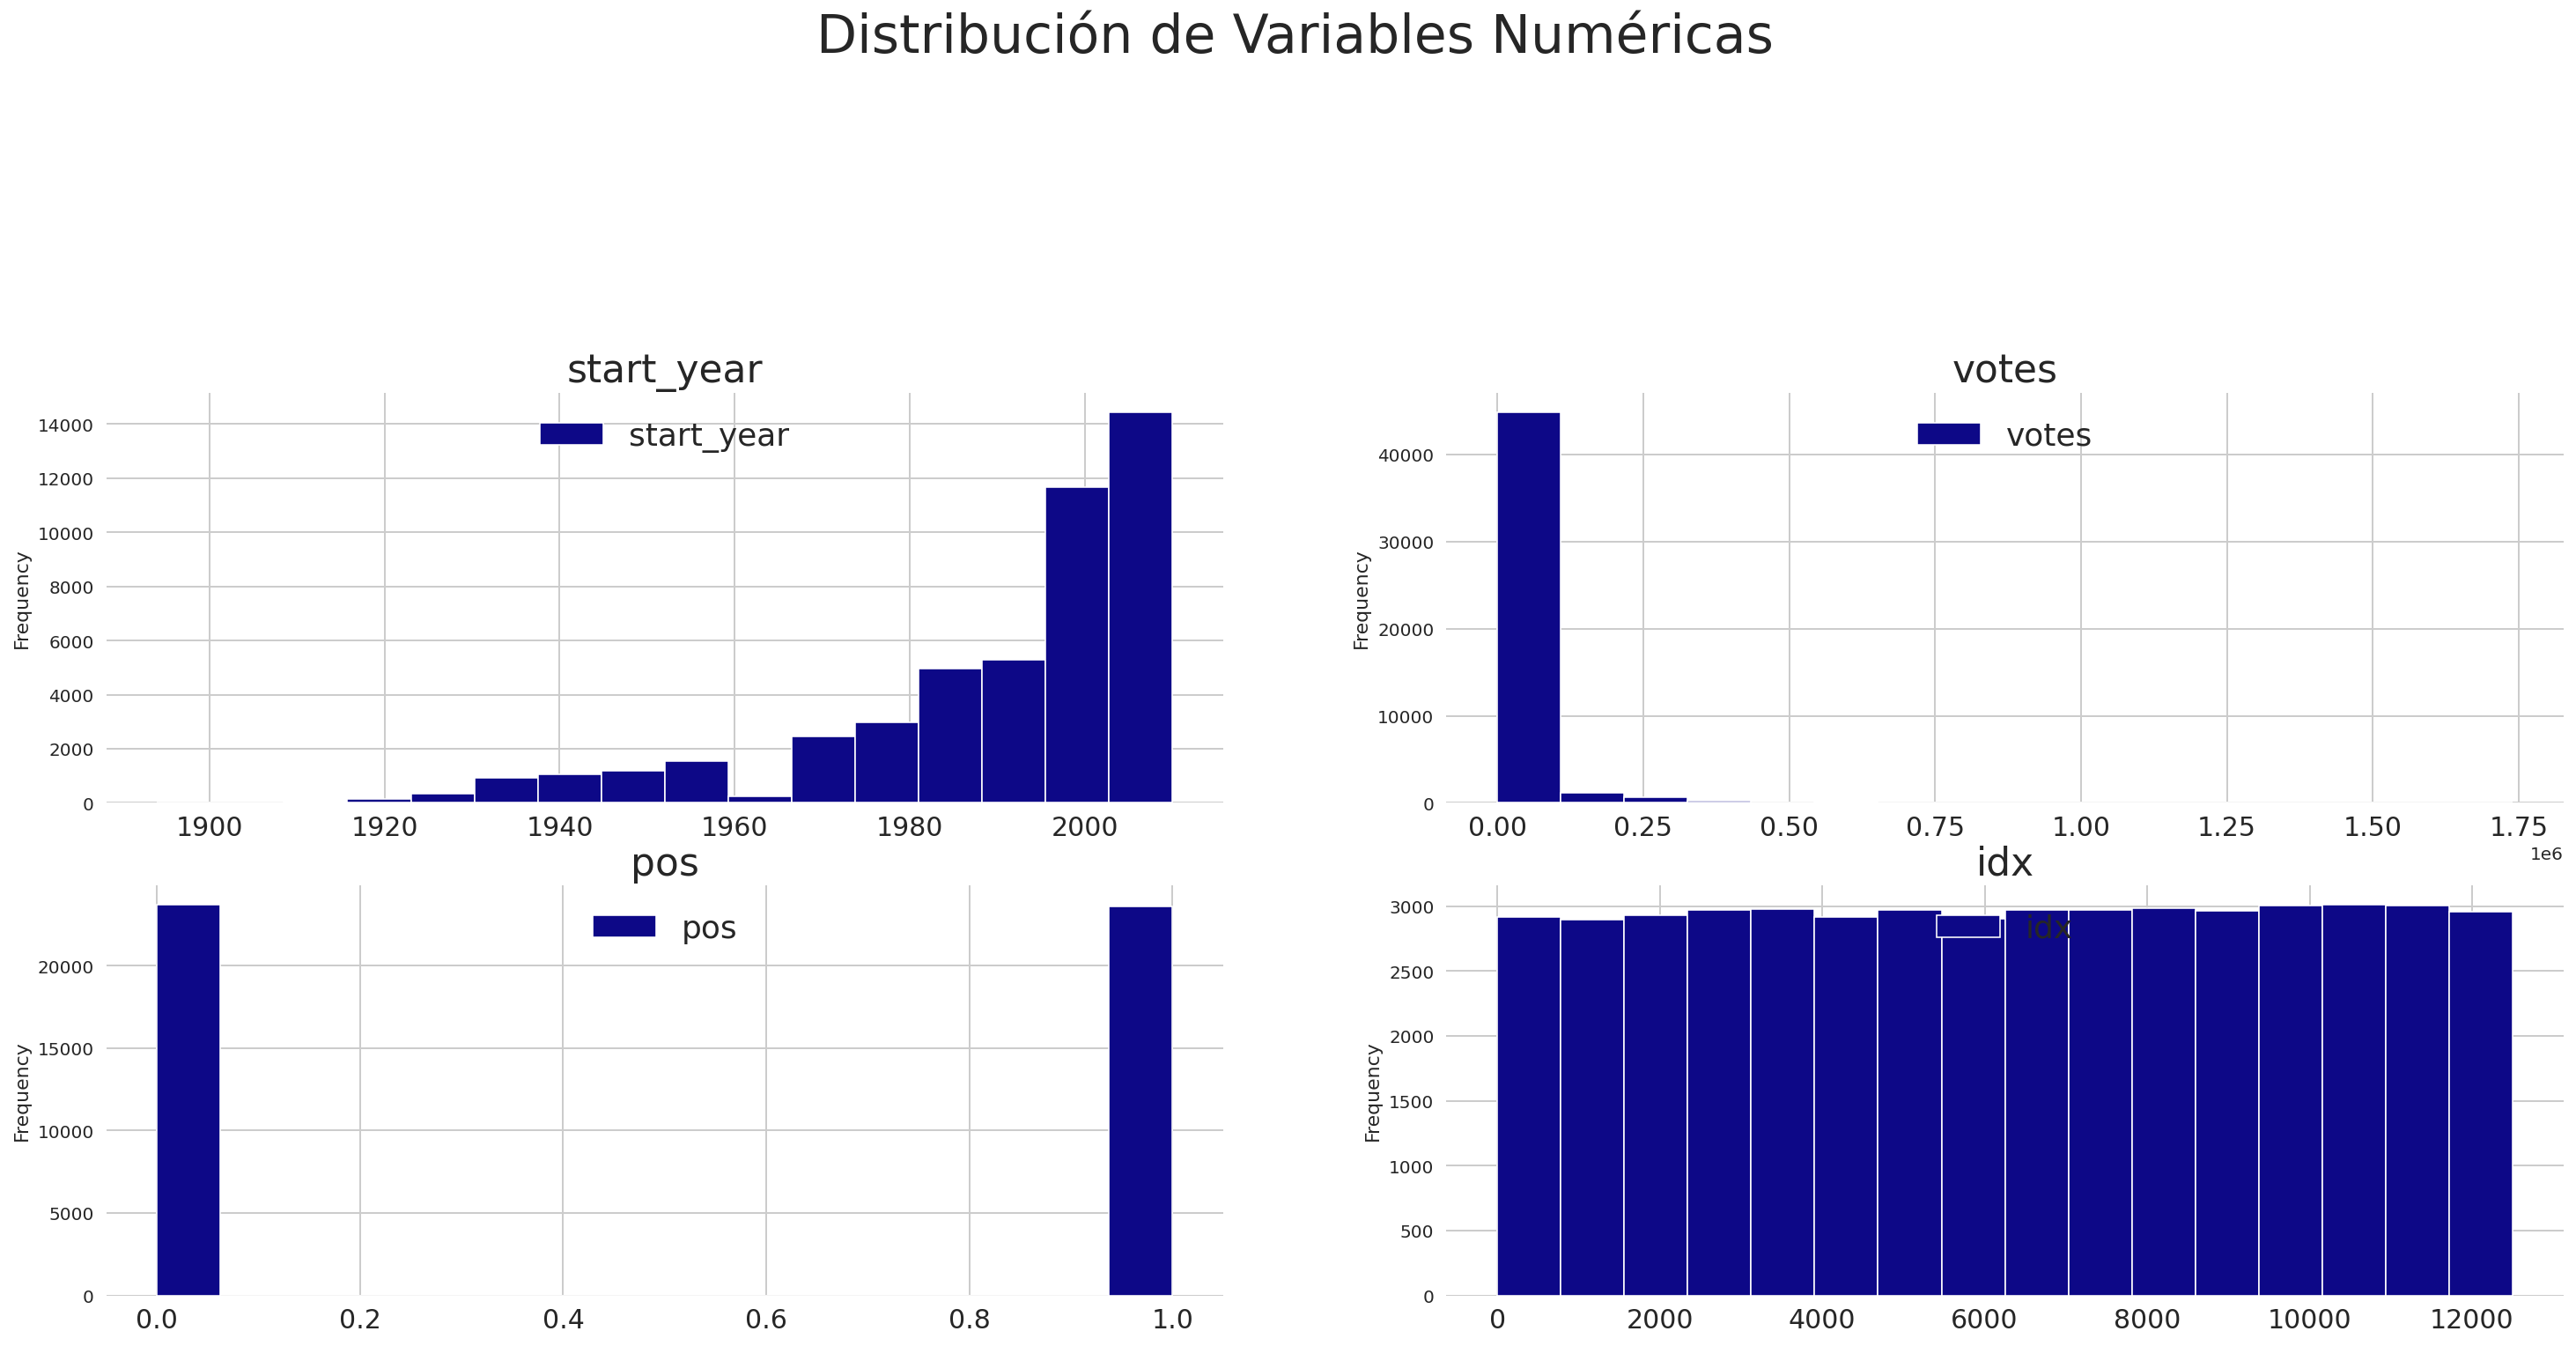

In [14]:
# Distribución de Variables Numéricas
#------------------------------------
a = 6 
b = 2 
c = 1

fig = plt.subplots(figsize=(25,30))

sns.set_style('whitegrid')
for i in df_reviews[number]:
    plt.subplot(a, b, c)
    df_reviews[number][i].plot(
        kind='hist', 
        title=i, 
        bins=16, 
        edgecolor='white', 
        cmap='plasma', 
        linewidth=0.8
    )
    plt.legend(loc='upper center', fontsize=18)
    plt.title(i, fontsize=22)
    plt.xticks(fontsize = 15)
    c = c+1
    
plt.suptitle('Distribución de Variables Numéricas', fontsize=30)
plt.tight_layout
plt.show()

**Observaciones**

- El año inicial `start_year` es en su mayoría arriba del año 2000
- Se realizaron en promedio **25 mi 500** votaciones
- La clasificación `pos` es del 50%

Veamos el número de películas y reseñas a lo largo de los años.

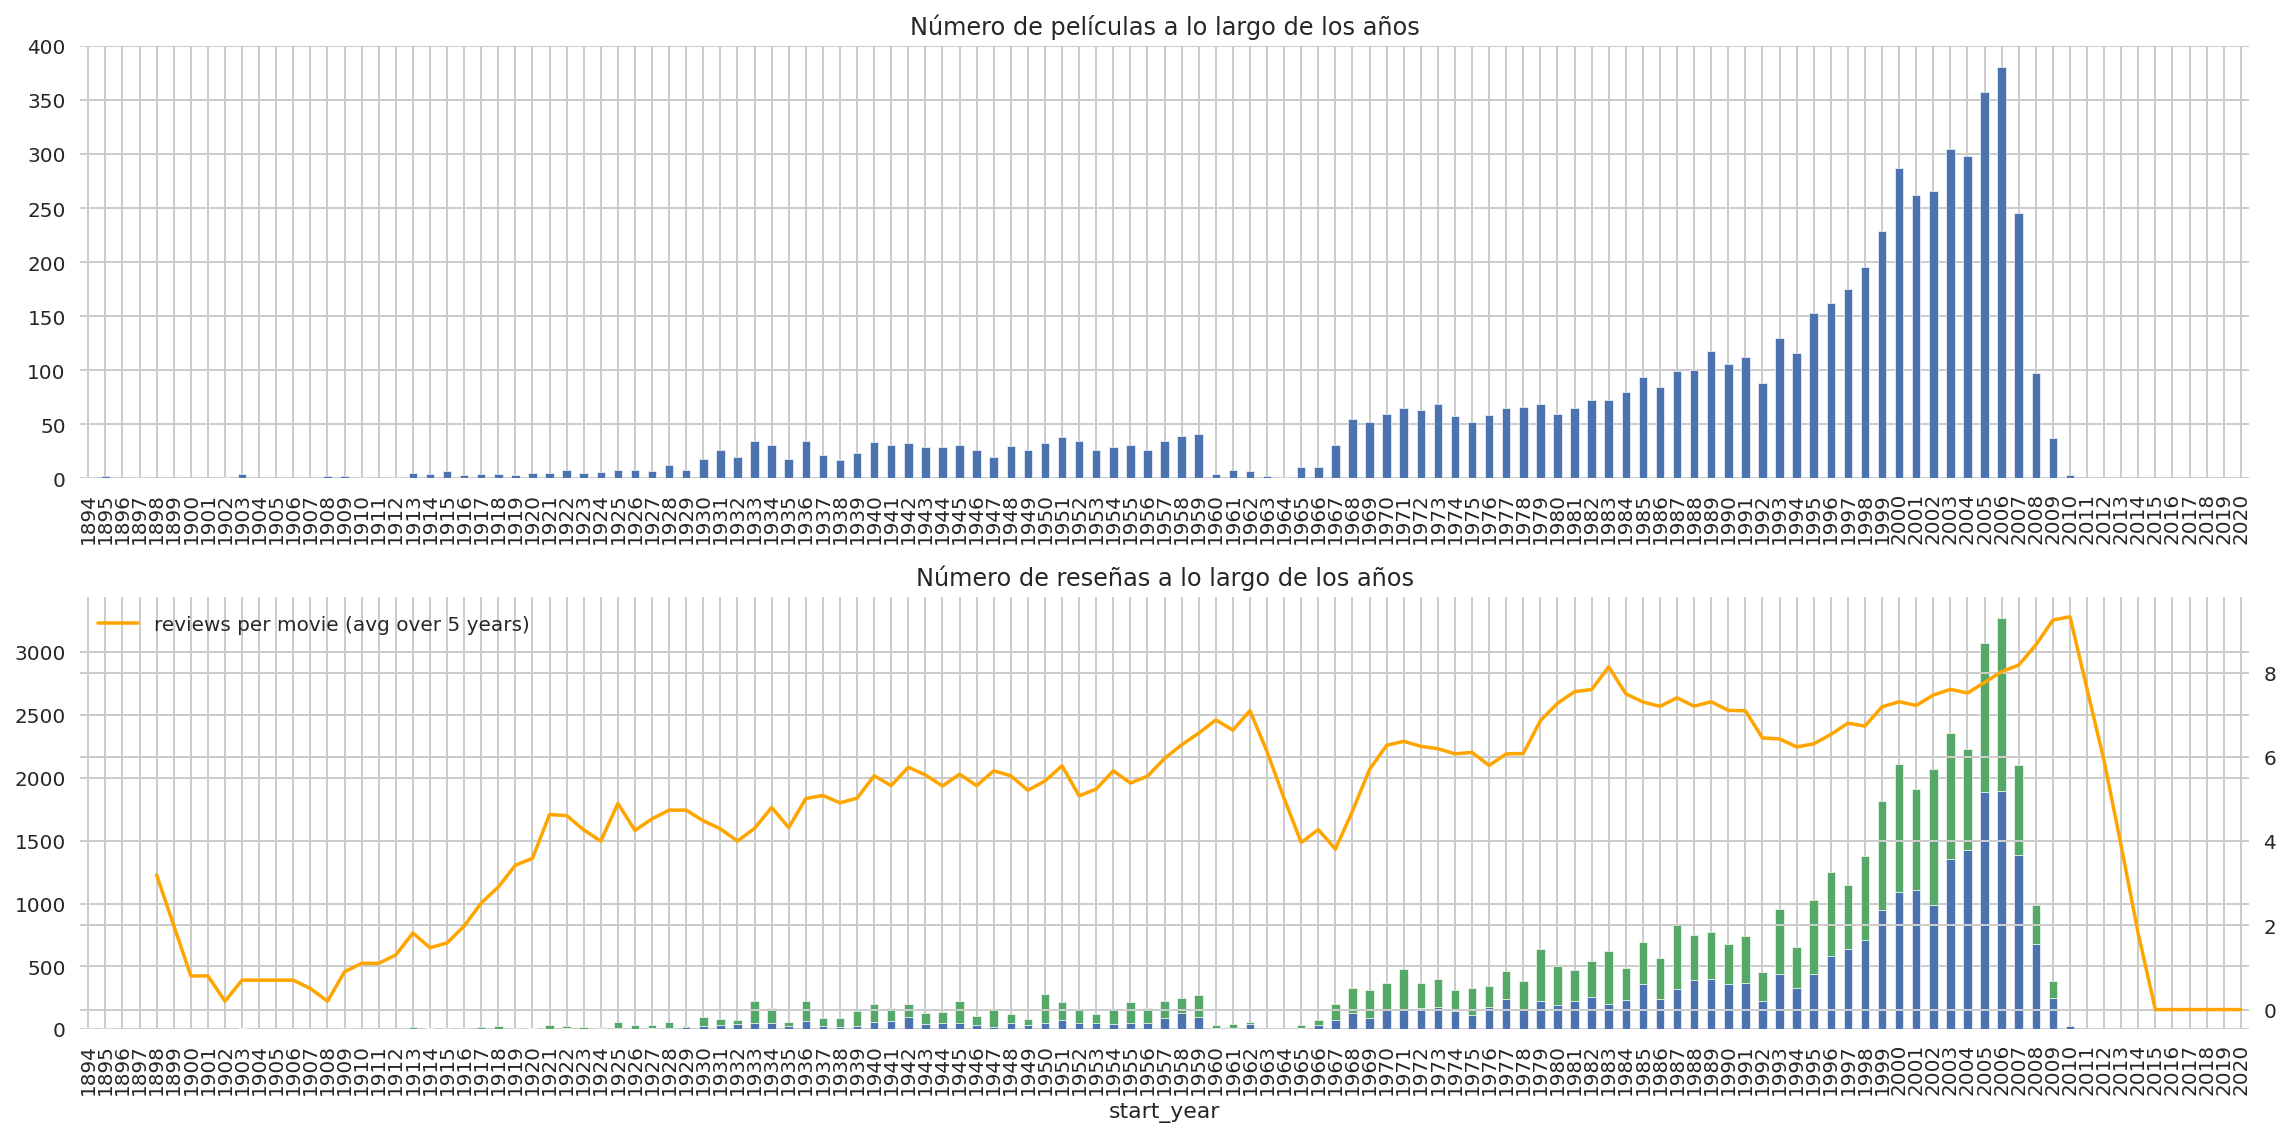

In [15]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Número de películas a lo largo de los años')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Número de reseñas a lo largo de los años')

fig.tight_layout()

Veamos la distribución del número de reseñas por película con el conteo exacto y KDE (solo para saber cómo puede diferir del conteo exacto)

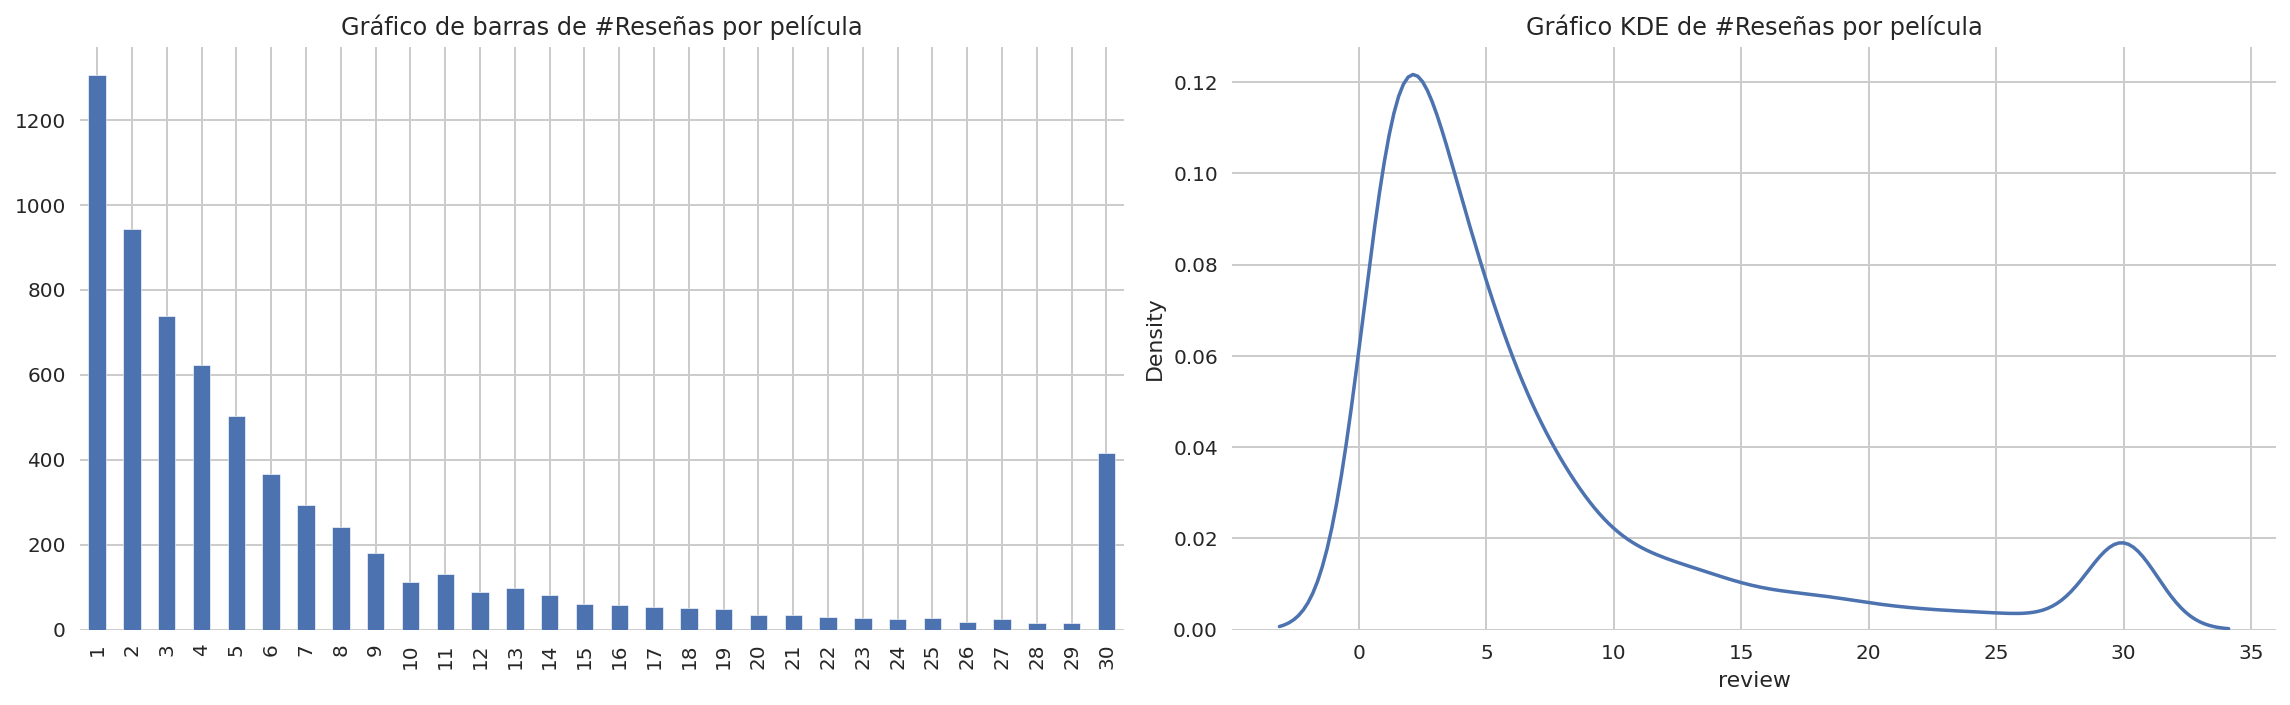

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Gráfico de barras de #Reseñas por película')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('Gráfico KDE de #Reseñas por película')

fig.tight_layout()

---

In [17]:
df_reviews['pos'].value_counts()

0    23715
1    23616
Name: pos, dtype: int64

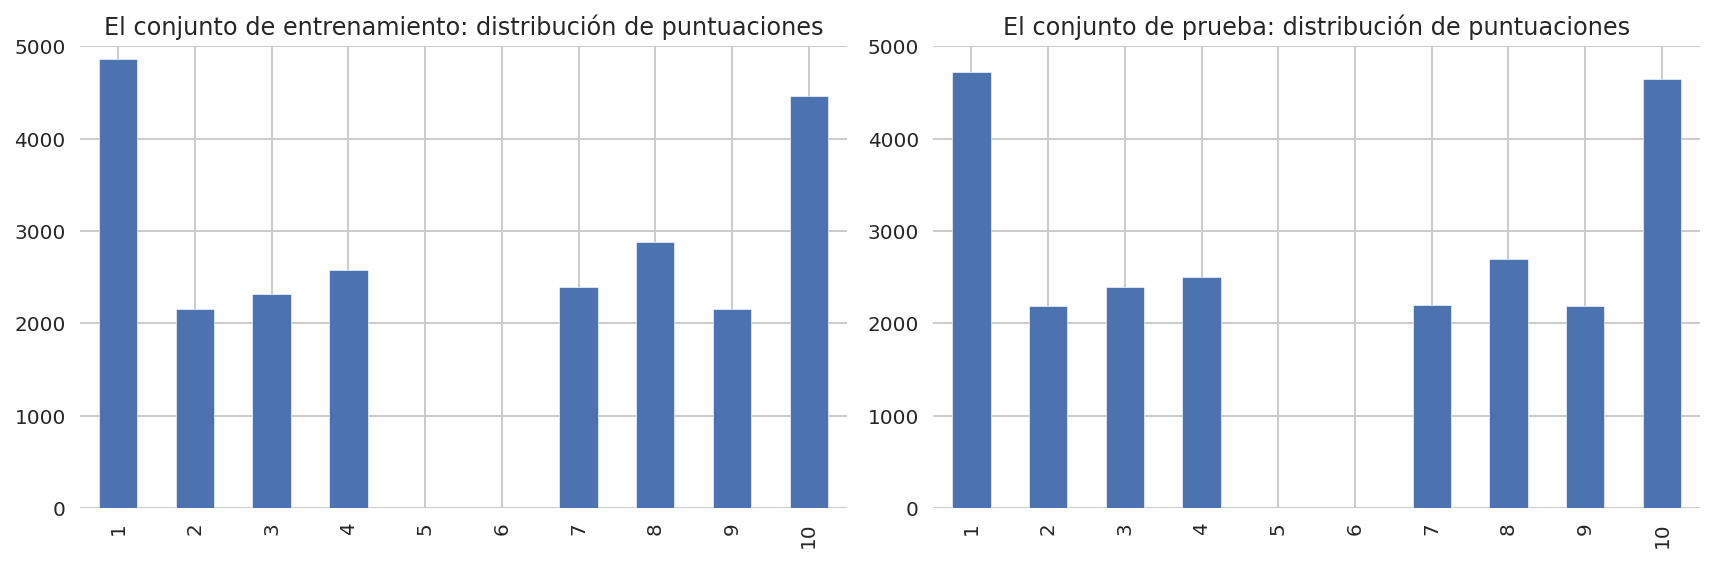

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('El conjunto de entrenamiento: distribución de puntuaciones')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('El conjunto de prueba: distribución de puntuaciones')

fig.tight_layout()

---

Distribución de reseñas negativas y positivas a lo largo de los años para dos partes del conjunto de datos

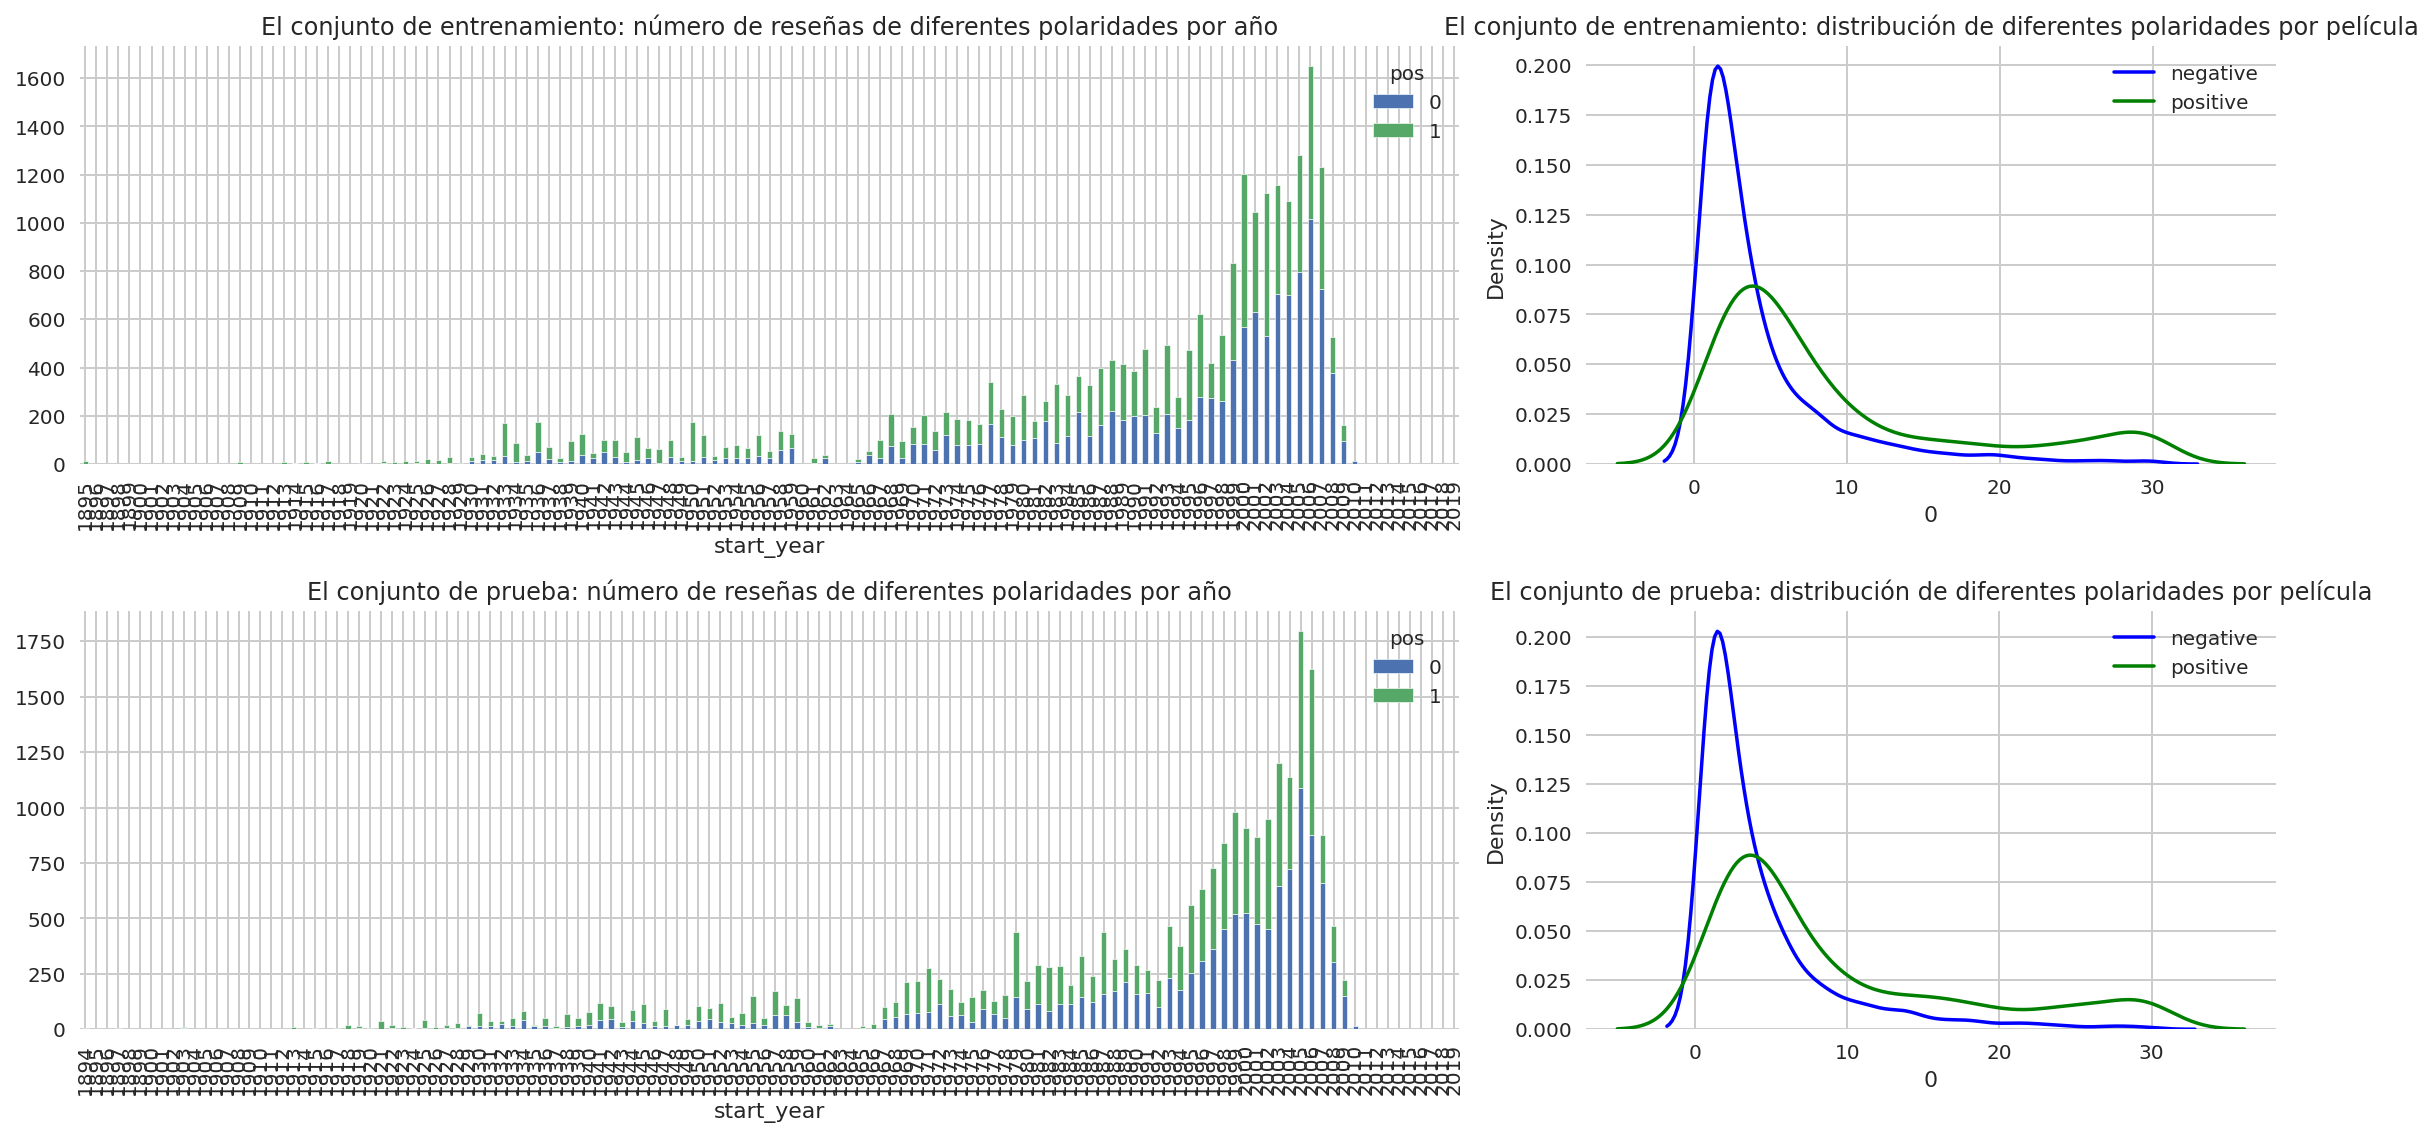

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de entrenamiento: número de reseñas de diferentes polaridades por año')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('El conjunto de entrenamiento: distribución de diferentes polaridades por película')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de prueba: número de reseñas de diferentes polaridades por año')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('El conjunto de prueba: distribución de diferentes polaridades por película')

fig.tight_layout()

## || Procedimiento de evaluación

---

Composición de una rutina de evaluación que se pueda usar para todos los modelos en este proyecto

In [20]:
def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # Valor F1
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'Valor F1') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'Curva ROC')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

## Normalización

Suponemos que todos los modelos a continuación aceptan textos en minúsculas y sin dígitos, signos de puntuación, etc.

In [21]:
# Tokenización
tokenizer = ToktokTokenizer()
# Stopwords
stopwords_list = nltk.corpus.stopwords.words("english")

**Eliminando corchetes**

In [22]:
# Eliminar corchetes
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Remover ruido de texto
def denoise_text(text):
    text = remove_between_square_brackets(text)
    return text

In [23]:
df_reviews['review_norm'] = df_reviews['review'].apply(denoise_text)

**Eliminando caracteres y letras especiales**

In [24]:
# Definimos funcion para remover caracteres y letras
def clear_text(text):  
    pattern = r"[^a-zA-z0-9\s']"
    text = re.sub(pattern, " ", text)
    text = text.split()
    text = " ".join(text)
    return(text)

In [25]:
df_reviews['review_norm'] = df_reviews['review_norm'].apply(clear_text)

**Lematización de las reseñas**

In [26]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lemmatize(text):

    doc = nlp(text.lower())
    
    lemmas = []
    for token in doc:
        lemmas.append(token.lemma_)
        
    return ' '.join(lemmas)

In [27]:
start_lem = time.time()
df_reviews['review_norm'] = df_reviews['review_norm'].apply(lemmatize)
end_lem = time.time()
print(f'Tiempo de Lematización: {end_lem-start_lem:.3f} seg')

Tiempo de Lematización: 1014.288 seg


**Removiendo stopwords**

In [28]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removiendo stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwords_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

{"won't", 'only', 'he', 'by', 'for', 'wasn', 'm', "wouldn't", 'be', "don't", "mightn't", 'd', 'being', 'ain', "isn't", 'with', 'about', "you'd", 'an', 'll', 'more', 'ourselves', 'were', "couldn't", 'there', 'down', 'any', 'needn', 've', 'up', 'we', 'not', 'above', 's', 'at', 'from', 'myself', 'had', 'doing', "shan't", 'which', 'to', "she's", 'theirs', 'of', 'same', 'until', 'she', 't', 'them', 'is', 'or', 'have', 'so', 'own', 'because', 'again', 'aren', 'after', 'their', 'our', 'few', "didn't", 'whom', 'very', "you're", 'has', 'does', 'will', 'why', 'mustn', 'was', 'my', "it's", 'both', "you've", 'ours', 'further', 'here', 'yours', 'i', 'that', 'him', 'where', 'her', 'most', 'they', 'do', "wasn't", 'on', "shouldn't", 'out', 'shan', "that'll", 'off', 'now', 'themselves', "weren't", "doesn't", 'yourselves', 'you', 'a', 'should', 'between', 'if', "needn't", 'those', 'below', 'and', 'hadn', "you'll", 'who', 'just', "haven't", 'himself', 'been', 're', 'hasn', 'isn', 'but', 'than', 'wouldn',

In [29]:
#Aplicamos función en reviews
start_sw = time.time()
df_reviews['review_norm']=df_reviews['review_norm'].apply(remove_stopwords)
end_sw = time.time()
print(f'Tiempo de Lematización: {end_sw-start_sw:.3f} seg')

Tiempo de Lematización: 40.598 seg


**Comparación sin NPL / con NPL**

In [30]:
df_reviews['review'][1]

'How the hell did they get this made?! Presenting itself as a caper comedy, the misbegotten "$" is essentially two hours of people mumbling sentence fragments. The usually dependable Warren Beatty looks drunk, and the usually hilarious Goldie Hawn acts like she\'s on depressants. As for Gert Frobe, his most famous role - Goldfinger - was infinitely more admirable than his character here. Not even the guy with the champagne bottle of LSD can save this litany of worthlessness. Am I comparing this movie to "Plan 9 from Outer Space"? I wouldn\'t do such a thing even if someone paid me. "P9FOS" was idiotically made but ended up hilarious; this was idiotically made and causes you to feel like your brain just melted out of your ears. Warren Beatty and Goldie Hawn made up for this when they co-starred in "Shampoo", but then they co-starred in the dreadful "Town & Country". Maybe they just shouldn\'t co-star in movies. All in all, I would rather have my skin torn off than have to watch this aga

In [31]:
df_reviews['review_norm'][1]

'hell get make present caper comedy misbegotten essentially two hour people mumble sentence fragment usually dependable warren beatty look drunk usually hilarious goldie hawn act like depressant gert frobe famous role goldfinger infinitely admirable character even guy champagne bottle lsd save litany worthlessness compare movie plan 9 outer space would thing even someone pay p9fos idiotically make end hilarious idiotically make cause feel like brain melt ear warren beatty goldie hawn make co star shampoo co star dreadful town country maybe co star movie would rather skin tear watch awful maybe remake jackie chan would pay see'

**CONCLUSIONES**

Hemos realizado un preprocesamiento del texto realizando lo siguiente:
- Se crea una lista de palabras (stopwords) que tienen poca relevancia para nuestros textos
- Se limpiaron los textos de corchetes, parenténtesis, signos, caracteres y letras
- Se realizó la lematización del texto
- Se removieron las palabras poco usuales en inglés
- Se realizó comparación del texto sin y con normalización

## || División entrenamiento / prueba
---

Por fortuna, todo el conjunto de datos ya está dividido en partes de entrenamiento/prueba; 'ds_part' es el indicador correspondiente.

In [32]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test  = df_reviews.query('ds_part == "test"').copy()

y_train = df_reviews_train['pos']
y_test  = df_reviews_test['pos']

print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23796, 18)
(23535, 18)


## || Term Frequency-Inverse Document Frequency model / TF-IDF
---

Ya hemos realizado el proceso de **TF-IDF** previamente así que solo nos resta dividir nuestros datos para poder trabajar adecuadamente con cada uno de los modelos de machine learning que vamos a desarrollar.

In [33]:
# Set de entrenamiento
train = df_reviews_train['review_norm']
test = df_reviews_test['review_norm']

# Creamos matriz de vectores en train
tf=TfidfVectorizer(stop_words=stop)
tf_idf = tf.fit(train)
X_train = tf_idf.transform(train)

# Creamos matriz de vectores en test
X_test = tf_idf.transform(test)

print("Tamaño en train:", X_train.shape, y_train.shape)
print("Tamaño en test: ", X_test.shape, y_test.shape)

Tamaño en train: (23796, 60253) (23796,)
Tamaño en test:  (23535, 60253) (23535,)


## || Trabajar con modelos
---

### Modelo 0 - Constante, Dummy Classifier

**DummyClassifier** hace predicciones que ignoran las características de entrada. Este clasificador sirve como una línea de base simple para comparar con otros clasificadores más complejos.

In [34]:
# instanciamos modelo
dm_clf=DummyClassifier()
# entrenamos modelo
dm_clf=dm_clf.fit(X_train, y_train)
print(dm_clf)

DummyClassifier()


**Evaluación del Modelo**

          train  test
Accuracy    0.5   0.5
F1          0.0   0.0
APS         0.5   0.5
ROC AUC     0.5   0.5


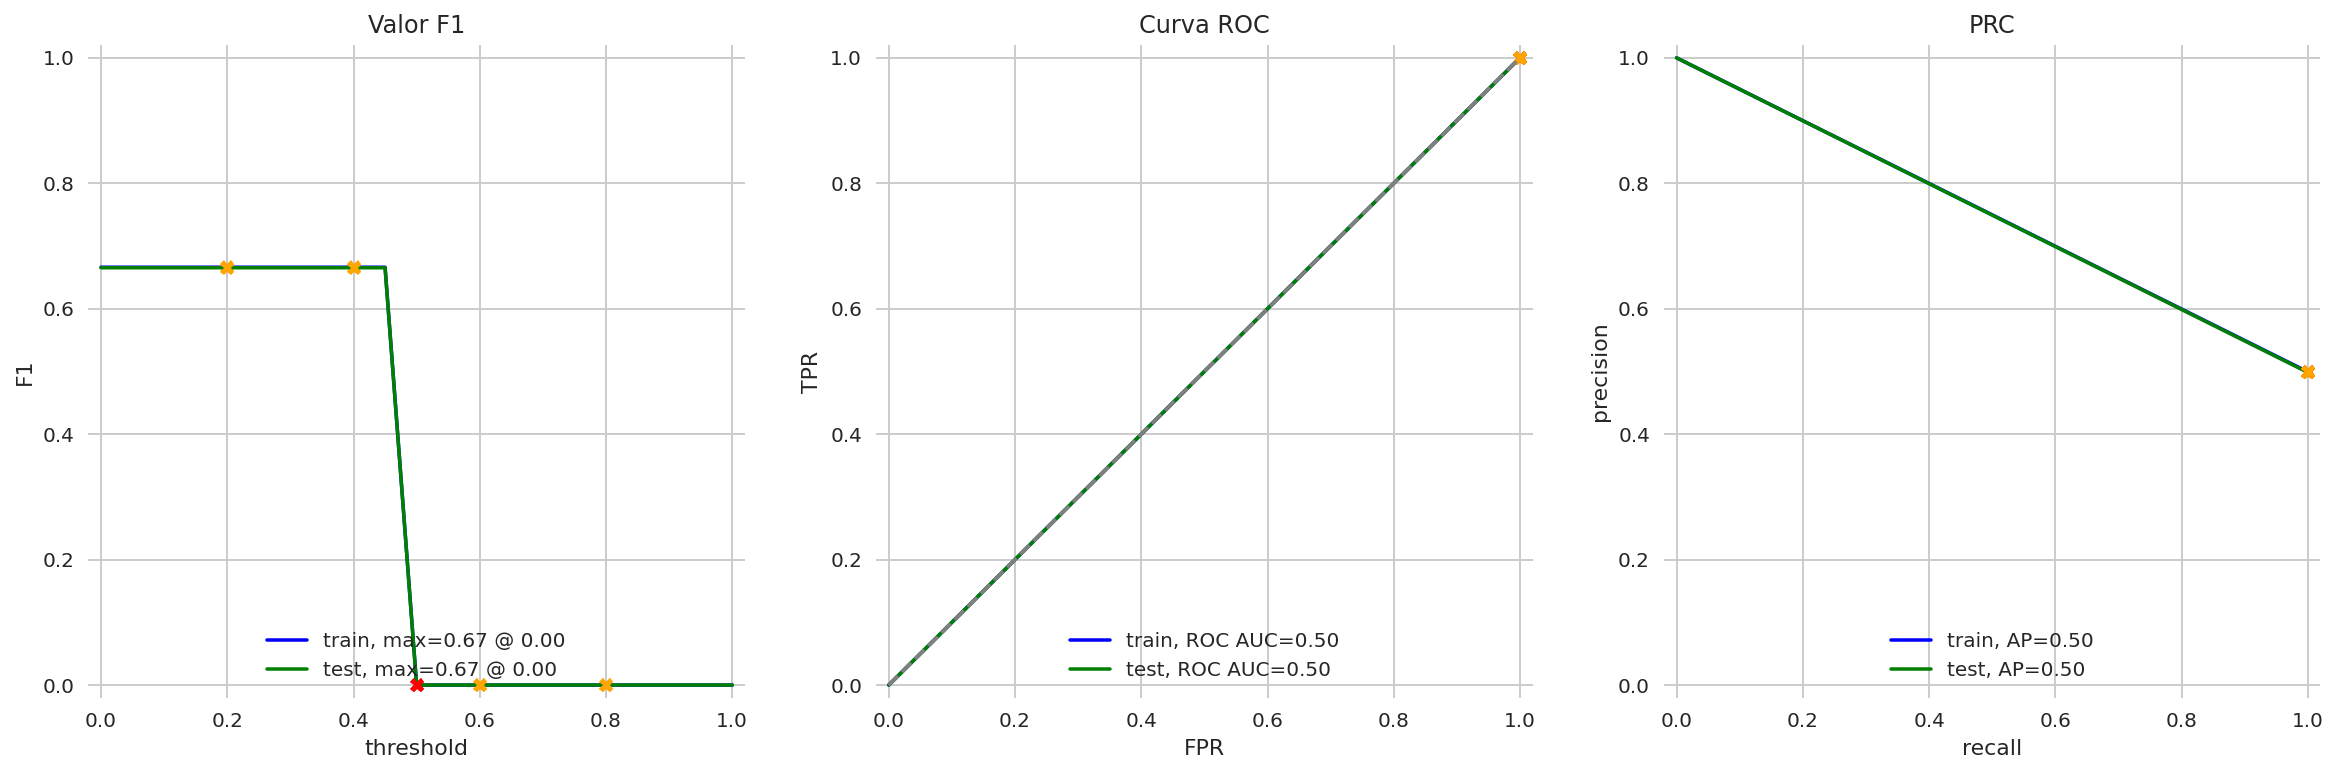

In [35]:
evaluate_model(dm_clf, X_train, y_train, X_test, y_test)

### Modelo 2 - Logistic Regression

En este modelo, las probabilidades que describen los posibles resultados de un solo ensayo se modelan mediante una función logística. Esta implementación puede adaptarse a la regresión logística binaria, uno contra el resto o multinomial con opción o regularización Elastic-Net.

In [36]:
# instanciamos el modelo
lr_clf  = LogisticRegression(C=1, penalty='l2', solver='liblinear')
# entrenamos modelo
lr_clf  = lr_clf.fit(X_train, y_train)
print(lr_clf)
# predicciones del modelo
y_preds = lr_clf.predict(X_test)
print(y_preds)

LogisticRegression(C=1, solver='liblinear')
[0 1 1 ... 1 1 1]


**Evaluación del Modelo**

          train  test
Accuracy   0.93  0.88
F1         0.93  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


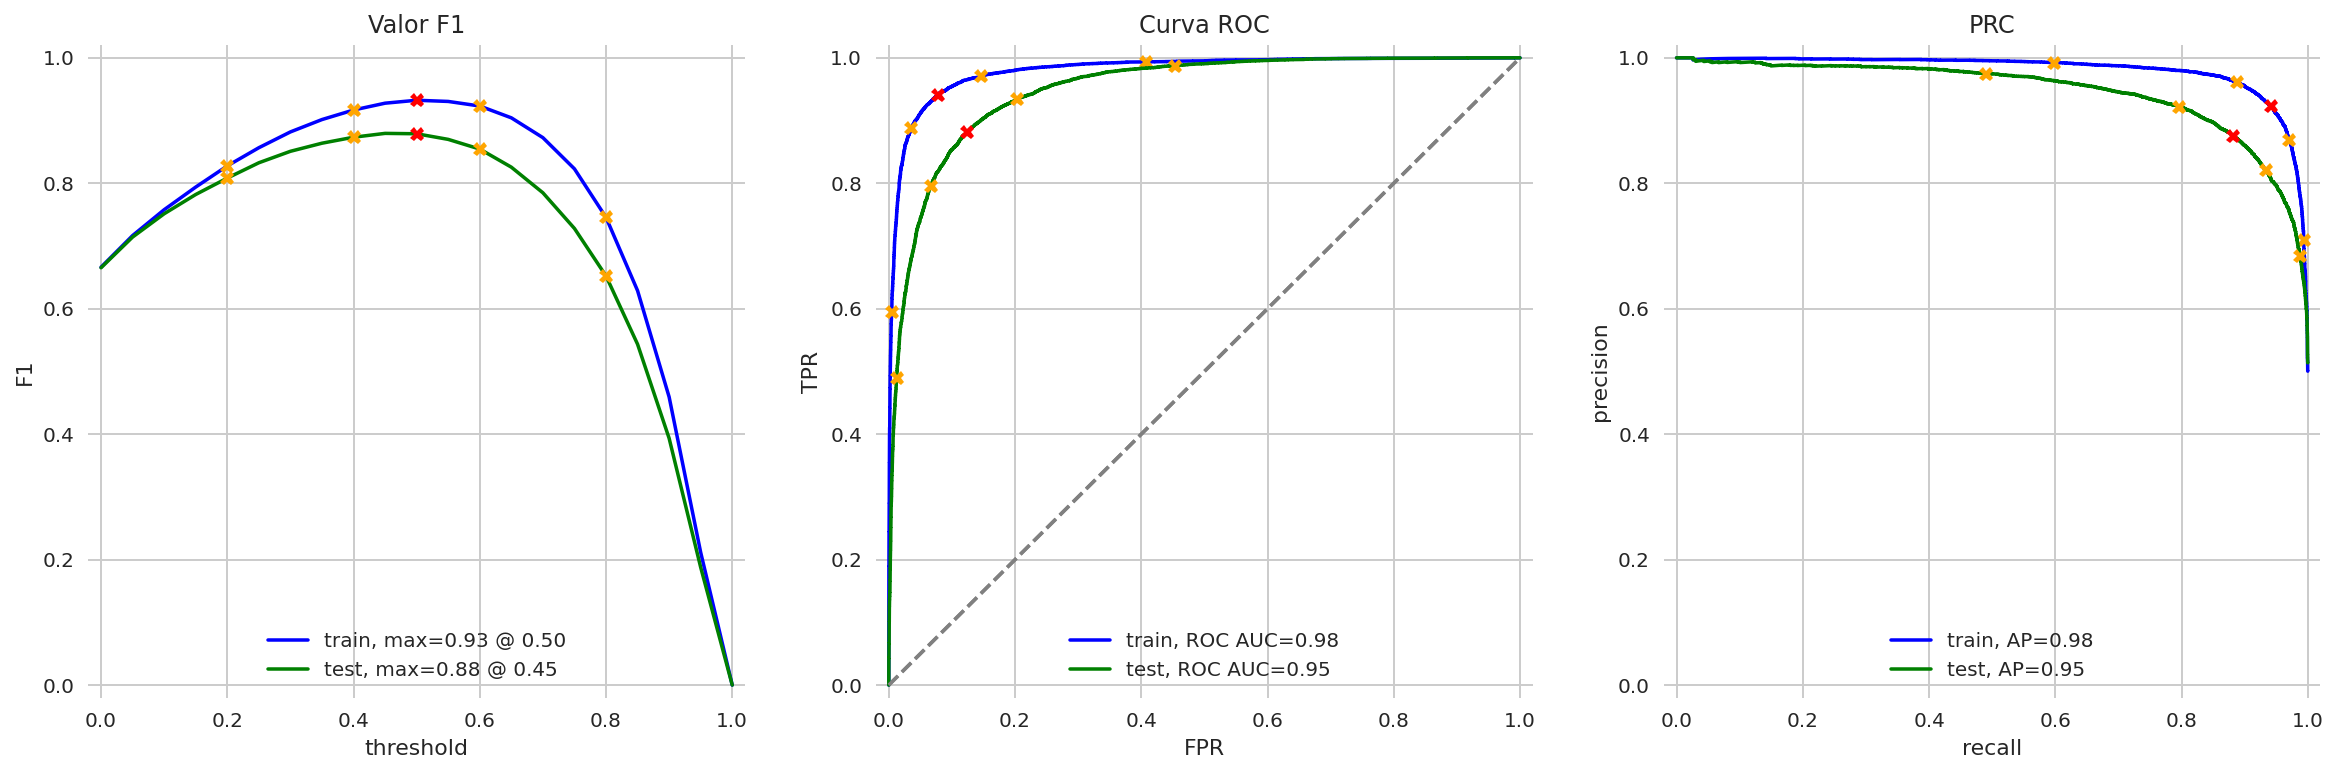

In [37]:
evaluate_model(lr_clf, X_train, y_train, X_test, y_test)

### Modelo 3 - Random Forest

In [38]:
h_params = {'n_estimators' : [100, 200, 400],
            'max_depth' : [1, 2, 4, 8, 10], 
            'random_state' : [42]}


gridSearch_rf = GridSearchCV(estimator = RandomForestClassifier(), 
                             param_grid = h_params, 
                             scoring = 'f1', 
                             cv=5)


start_gs = time.time()
gridSearch_rf.fit(X_train, y_train)
end_gs = time.time()

print(f"Tiempo de ajuste de hiperparámetros Random Forest: {end_gs-start_gs:.3f} seg")

Tiempo de ajuste de hiperparámetros Random Forest: 470.423 seg


In [39]:
max_score = gridSearch_rf.cv_results_['mean_test_score'].max()
index_max_score = np.where(gridSearch_rf.cv_results_['mean_test_score'] == max_score)[0][0]

best_set_params = gridSearch_rf.cv_results_['params'][index_max_score]

print(f"Mejores Hiperparámetros del Modelo: {best_set_params} | Mejor F1: {max_score:.3f}")

Mejores Hiperparámetros del Modelo: {'max_depth': 10, 'n_estimators': 400, 'random_state': 42} | Mejor F1: 0.841


In [40]:
# Entrenamiento del Modelo
rf_clf = RandomForestClassifier(
    random_state=42, n_estimators=400, max_depth=10)
rf_clf = rf_clf.fit(X_train, y_train)
print(rf_clf)

rf_preds = rf_clf.predict(X_test)
print(rf_preds)

RandomForestClassifier(max_depth=10, n_estimators=400, random_state=42)
[0 1 0 ... 0 1 1]


**Evaluación del Modelo**

          train  test
Accuracy   0.89  0.84
F1         0.89  0.84
APS        0.96  0.91
ROC AUC    0.96  0.92


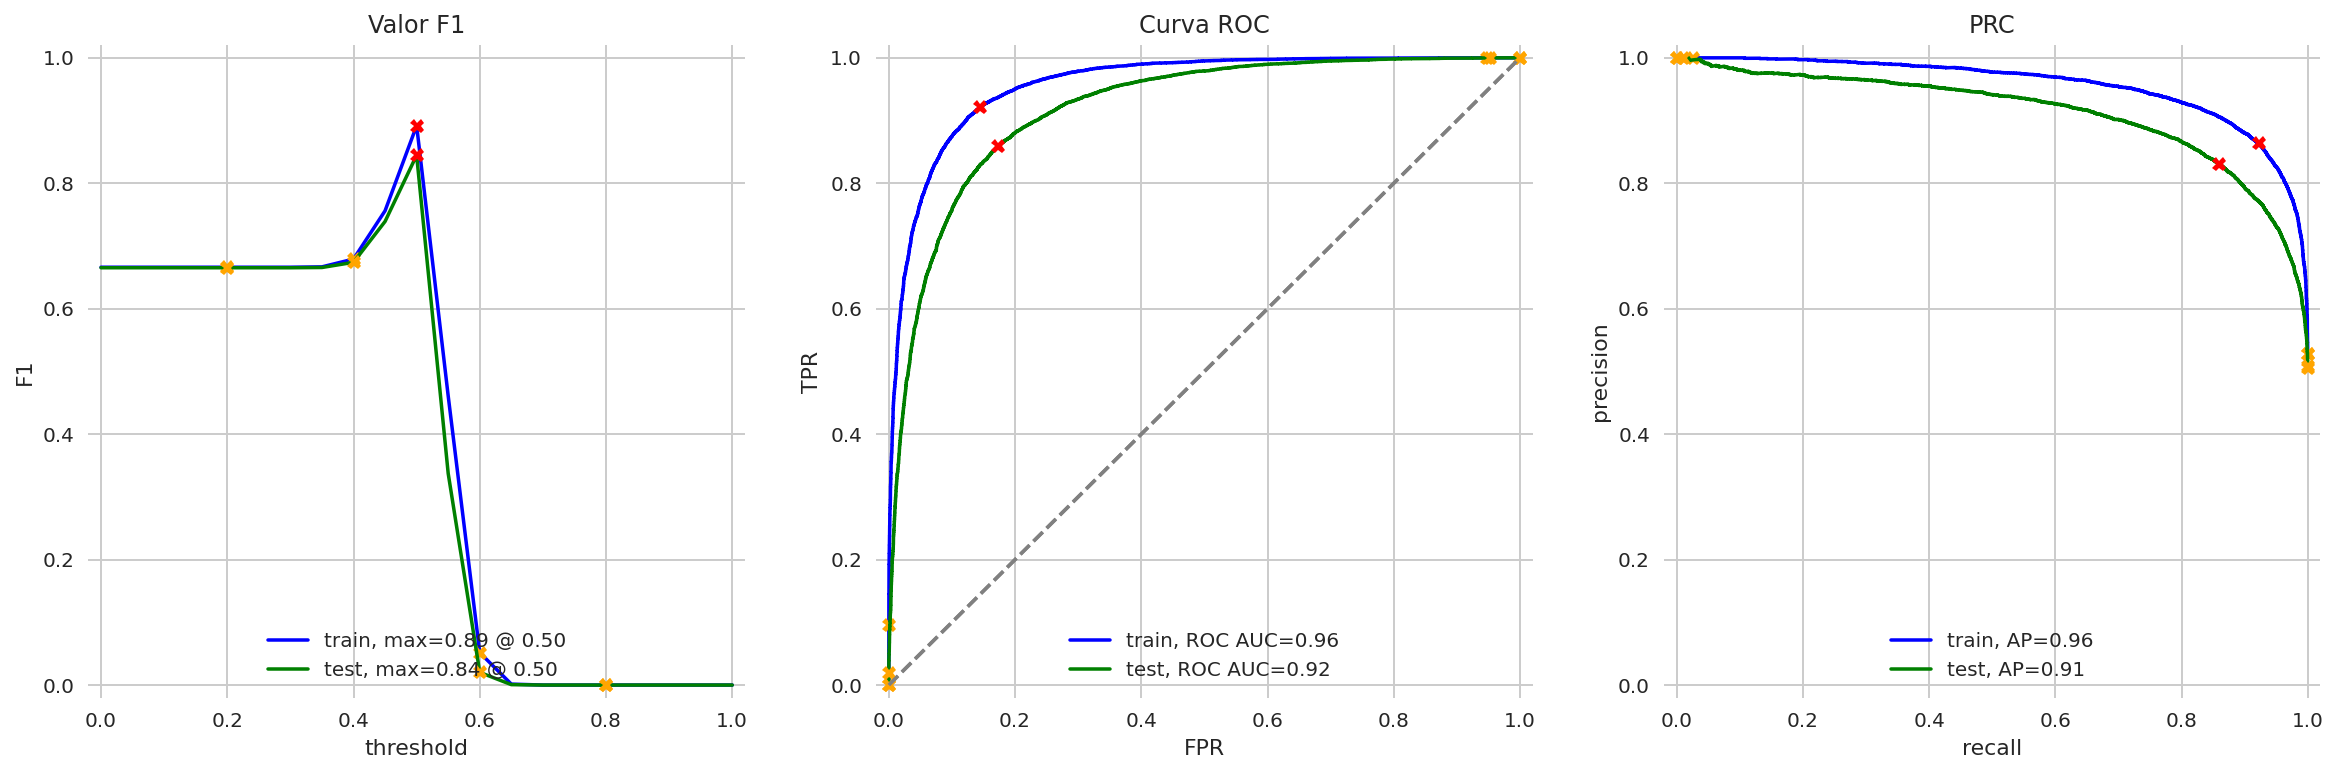

In [41]:
evaluate_model(rf_clf, X_train, y_train, X_test, y_test)

### Modelo 4 - LGBMClassifier

In [42]:
params_lightgbm = {'max_depth'    : [5],
                   'n_estimators' : [50, 100, 200],
                   'random_state' : [42],
                   'learning_rate': [0.5, 0.1, 0.2]
                  }


lightgbm_clf = LGBMClassifier()

gridSearch_lgbm = GridSearchCV(
    n_jobs    = -1,
    estimator = lightgbm_clf, 
    param_grid= params_lightgbm, 
    scoring   = 'f1',
    cv=2
)

start_lgbm = time.time()
gridSearch_lgbm.fit(X_train, y_train)
end_lgbm = time.time()
print(f'Tiempo de Entrenamiento: {end_lgbm-start_lgbm:.3f} seg')

Tiempo de Entrenamiento: 306.392 seg


In [43]:
max_score_lgbm = gridSearch_lgbm.cv_results_['mean_test_score'].max()
index_max_score_lgbm = np.where(gridSearch_lgbm.cv_results_['mean_test_score'] == max_score_lgbm)[0][0]

best_lgbm_set_params = gridSearch_lgbm.cv_results_['params'][index_max_score_lgbm]

print(f"Mejores Hiperparámetros del Modelo: {best_lgbm_set_params} | Mejor F1: {max_score_lgbm:.3f}")

Mejores Hiperparámetros del Modelo: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'random_state': 42} | Mejor F1: 0.848


**Entrenamiento del Modelo**

In [44]:
lightgbm_model   = LGBMClassifier(
    n_estimators = 200,
    learning_rate= 0.2,
    num_leaves   = 20,
    max_depth    = 5,
    random_seed  = 42)


start_gbm = time.time()
lightgbm_model.fit(X_train, y_train)
end_gbm = time.time()

lgbm_predictions = lightgbm_model.predict(X_test)
print(f'Tiempo de Entrenamiento: {end_gbm-start_gbm:.3f} seg')

Tiempo de Entrenamiento: 49.572 seg


**Evaluación del Modelo**

          train  test
Accuracy   0.94  0.86
F1         0.94  0.86
APS        0.99  0.93
ROC AUC    0.99  0.94


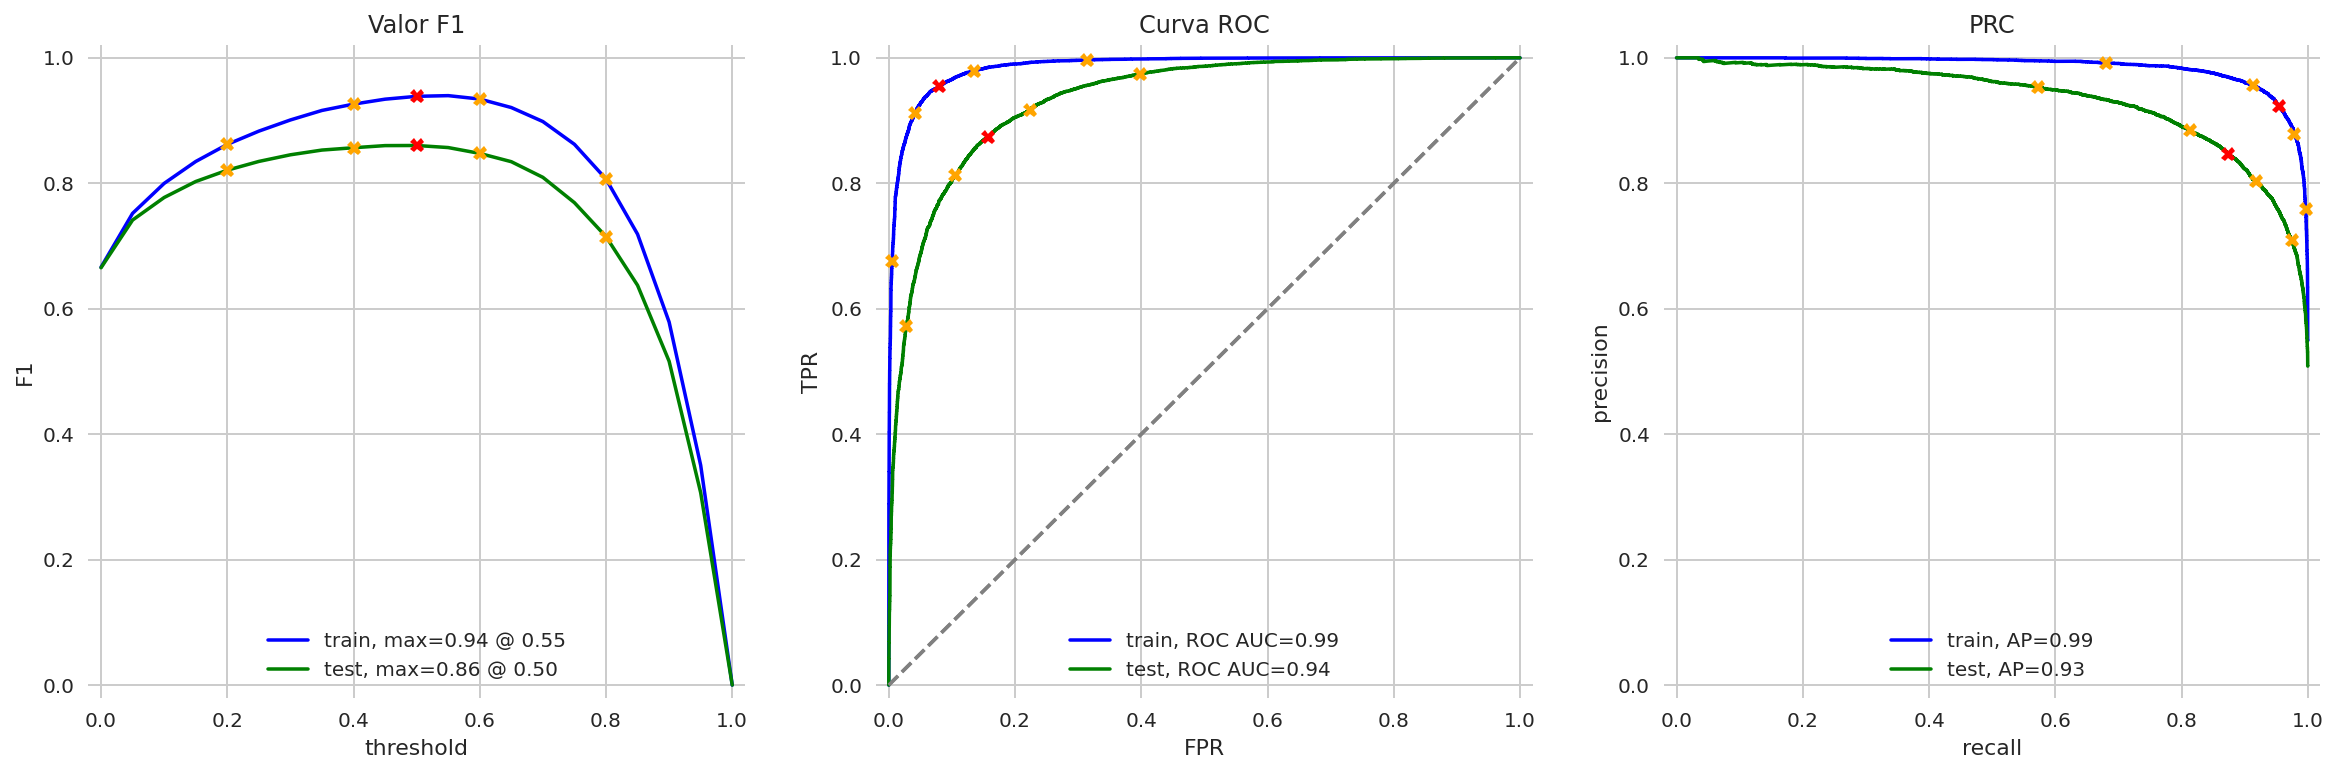

In [45]:
evaluate_model(lightgbm_model, X_train, y_train, X_test, y_test)

## Mis reseñas

In [51]:
# puedes eliminar por completo estas reseñas y probar tus modelos en tus propias reseñas; las que se muestran a continuación son solo ejemplos

my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])

"""
my_reviews = pd.DataFrame([
    'Simplemente no me gustó, no es mi tipo de película.',
    'Bueno, estaba aburrido y me quedé dormido a media película.',
    'Estaba realmente fascinada con la película',    
    'Hasta los actores parecían muy viejos y desinteresados, y les pagaron por estar en la película. Qué robo tan desalmado.',
    '¡No esperaba que el relanzamiento fuera tan bueno! Los escritores realmente se preocuparon por el material original',
    'La película tuvo sus altibajos, pero siento que, en general, es una película decente. Sí la volvería a ver',
    'Qué pésimo intento de comedia. Ni una sola broma tiene sentido, todos actúan de forma irritante y ruidosa, ¡ni siquiera a los niños les gustará esto!',
    'Fue muy valiente el lanzamiento en Netflix y realmente aprecio poder seguir viendo episodio tras episodio de este nuevo drama tan emocionante e inteligente.'
], columns=['review'])
"""

# limpieza de texto
my_reviews['review_norm'] = my_reviews['review'].apply(clear_text)
# lematización
my_reviews['review_norm'] = my_reviews['review_norm'].apply(lemmatize)
# remove stopwords
my_reviews['review_norm'] = my_reviews['review_norm'].apply(remove_stopwords)

print("Texto sin Normalizar")
print(my_reviews['review'][6])
print()
print("Texto Normalizado")
print(my_reviews['review_norm'][6])

Texto sin Normalizar
What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won't like this!

Texto Normalizado
rotten attempt comedy single joke land everyone act annoying loud even kid like


### Modelo 2

In [52]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = lr_clf.predict_proba(tf_idf.transform(texts))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}: {review}')

0.20: simply like kind movie
0.12: well bored feel asleep middle movie
0.49: really fascinated movie
0.15: even actor look really old di ##sin ##ter ##est ##e get pay movie soul ##less cash grab
0.23: expect ##boot good writer really care source material
0.43: movie upside downs ##ide feel like overall decent flick could see go see
0.03: rotten attempt comedy single joke land everyone act annoying loud even kid like
0.92: launch netflix brave move really appreciate able bing ##e episode episode exciting intelligent new d


### Modelo 3

In [53]:
texts = my_reviews['review_norm']
my_reviews_pred_prob = rf_clf.predict_proba(tf_idf.transform(texts.apply(lambda x: lemmatize(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.51:  simply like kind movie
0.51:  well bored feel asleep middle movie
0.52:  really fascinated movie
0.50:  even actor look really old di ##sin ##ter ##est ##e get pay movie soul ##less cash grab
0.52:  expect ##boot good writer really care source material
0.50:  movie upside downs ##ide feel like overall decent flick could see go see
0.49:  rotten attempt comedy single joke land everyone act annoying loud even kid like
0.53:  launch netflix brave move really appreciate able bing ##e episode episode exciting intelligent new d


### Modelo 4

In [54]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = lightgbm_model.predict_proba(tf_idf.transform(texts.apply(lambda x: lemmatize(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.61:  simply like kind movie
0.41:  well bored feel asleep middle movie
0.61:  really fascinated movie
0.47:  even actor look really old di ##sin ##ter ##est ##e get pay movie soul ##less cash grab
0.64:  expect ##boot good writer really care source material
0.67:  movie upside downs ##ide feel like overall decent flick could see go see
0.36:  rotten attempt comedy single joke land everyone act annoying loud even kid like
0.78:  launch netflix brave move really appreciate able bing ##e episode episode exciting intelligent new d


## Conclusiones

In [56]:
# Trazamos tabla con resultados 
models_table = pd.DataFrame({'model': ['Dummy', 'Logistic Regression', 'Random Forest', 'LightGBM'],
                            'f1_train': [0.0, 0.93, 0.89, 0.94],
                            'f1_test' : [0.0, 0.88, 0.84, 0.86]})

In [57]:
models_table.sort_values(by='f1_test', ascending=False)

,model,f1_train,f1_test
1,Logistic Regression,0.93,0.88
3,LightGBM,0.94,0.86
2,Random Forest,0.89,0.84
0,Dummy,0.00,0.00


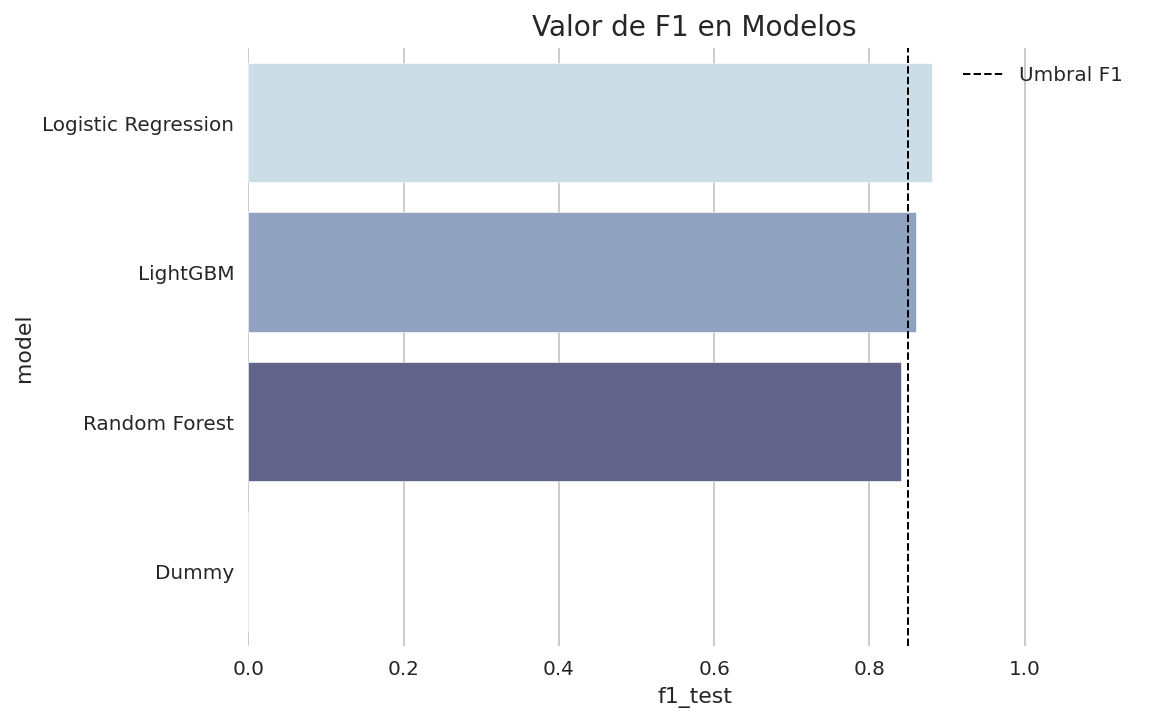

In [58]:
sns.barplot(x='f1_test', y='model', data=models_table.sort_values(by='f1_test', ascending=False), palette=("ch:s=.25,rot=-.25"))
plt.axvline(x=0.85, color='black', ls='--', lw=1, label="Umbral F1")
plt.xlim(0,1.15)
plt.title("Valor de F1 en Modelos", fontsize=14)
plt.legend()
plt.show;

**OBSERVACIONES**

- El modelo que obtuvo la evaluación más alta es la Regresión Logística que logra un Score F1 de 0.88 lo cual supera al nivel esperado de 0.85.
- El segundo mejor modelo es LightGBM.
- El peor modelo fue Dummy Classifier.
- No fue posible implementar el modelo BERT por cuestiones limitantes en los procesos de computación.
- Se cargaron los datos y se preprocesaron
- Se entrenaron 4 modelos diferentes
- Se alcanzó el umbral de la métrica

# Lista de comprobación

- [x]  Abriste el notebook
- [x]  Cargaste y preprocesaste los datos de texto para su vectorización
- [x]  Transformaste los datos de texto en vectores
- [x]  Entrenaste y probaste los modelos
- [x]  Se alcanzó el umbral de la métrica
- [x]  Colocaste todas las celdas de código en el orden de su ejecución
- [x]  Puedes ejecutar sin errores todas las celdas de código 
- [x]  Hay conclusiones 